In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_original = pd.read_csv('../../train.csv')

df = df_original.copy()
df.drop(['house_id'], axis=1)

,date,location,type,block,street,storey_range,area_sqm,flat_model,commence_date,price
0,2006-09,Raleigh,5 ROOM,107D,Agawan Court,07 TO 09,110.0,D,2003,313000.0
1,2007-06,Fresno,3 ROOM,678,Cleo St,07 TO 09,64.0,N,1988,167000.0
2,2010-09,Tucson,4 ROOM,5,E Pleasant View Way,10 TO 12,92.0,K,1976,430000.0
3,2007-04,Austin,4 ROOM,326,Park Hollow Ln,10 TO 12,92.0,K,1977,303800.0
4,2001-10,Honolulu,4 ROOM,794,Ala Puawa Place,04 TO 06,102.0,G,1998,212000.0
...,...,...,...,...,...,...,...,...,...,...
271716,2003-01,Omaha,4 ROOM,483,Sandra Ln,04 TO 06,103.0,G,1989,232000.0
271717,2000-11,Omaha,5 ROOM,615,Atkin Rd,10 TO 12,134.0,G,1996,428000.0
271718,2011-04,Boston,5 ROOM,390,Kempton Street,13 TO 15,118.0,D,2004,548888.0
271719,2010-09,Fresno,4 ROOM,968,Magnolia Dale Dr,13 TO 15,90.0,I,1999,360000.0


In [3]:
df['location'].unique()

array(['Raleigh', 'Fresno', 'Tucson', 'Austin', 'Honolulu', 'Riverside',
       'Omaha', 'Washington', 'Albuquerque', 'Chicago', 'Tampa',
       'Milwaukee', 'Arlington', 'Pittsburgh', 'Boston', 'Sacramento',
       'Seatle', 'Miami', 'Minneapolis', 'Cleveland', 'Denver', 'Mesa',
       'Oakland', 'Atlanta', 'Portland', 'Baltimore'], dtype=object)

In [4]:
df = df[df['location'] == 'Washington']
df

,house_id,date,location,type,block,street,storey_range,area_sqm,flat_model,commence_date,price
9,106886,2003-04,Washington,4 ROOM,102,High View Ter SE,04 TO 06,80.0,O,1970,235000.0
81,156551,2005-02,Washington,4 ROOM,52,Shepherd Road NW,10 TO 12,103.0,G,1986,310000.0
100,108903,2003-05,Washington,4 ROOM,112,Arizona Ter NW,04 TO 06,105.0,G,1985,295000.0
115,181582,2006-01,Washington,5 ROOM,37,Alabama Avenue SE,16 TO 18,117.0,O,1976,345000.0
150,108918,2003-05,Washington,5 ROOM,74,Lafayette Avenue NE,19 TO 21,117.0,O,1978,372000.0
...,...,...,...,...,...,...,...,...,...,...,...
271630,292627,2010-04,Washington,5 ROOM,5,7th Pl NW,07 TO 09,127.0,D,1980,575000.0
271652,268968,2009-07,Washington,5 ROOM,36,McCollough Ct NW,13 TO 15,119.0,D,1999,540000.0
271669,227684,2007-11,Washington,4 ROOM,146,E Street NW,04 TO 06,94.0,K,1981,268000.0
271690,46446,2001-06,Washington,5 ROOM,82,Canal Road NW,10 TO 12,120.0,D,1996,482000.0


<Axes: xlabel='area_sqm', ylabel='price'>

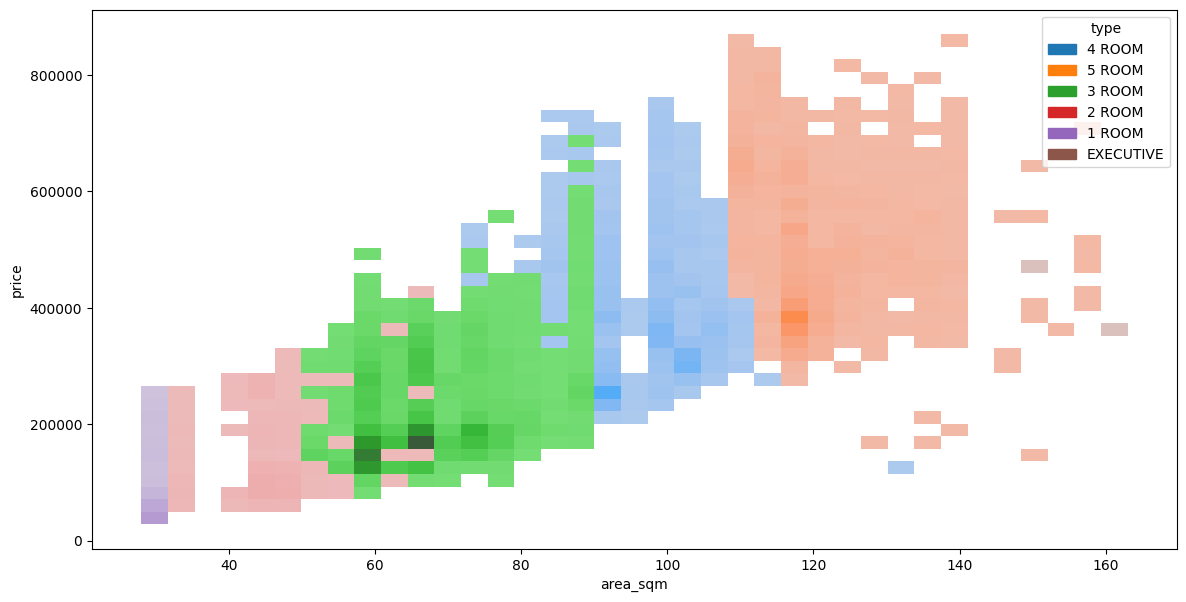

In [5]:
plt.figure(figsize=(14, 7))
sns.histplot(x="area_sqm", y="price", data=df, hue='type', hue_order=df['type'].unique().sort())

<Axes: xlabel='area_sqm', ylabel='price'>

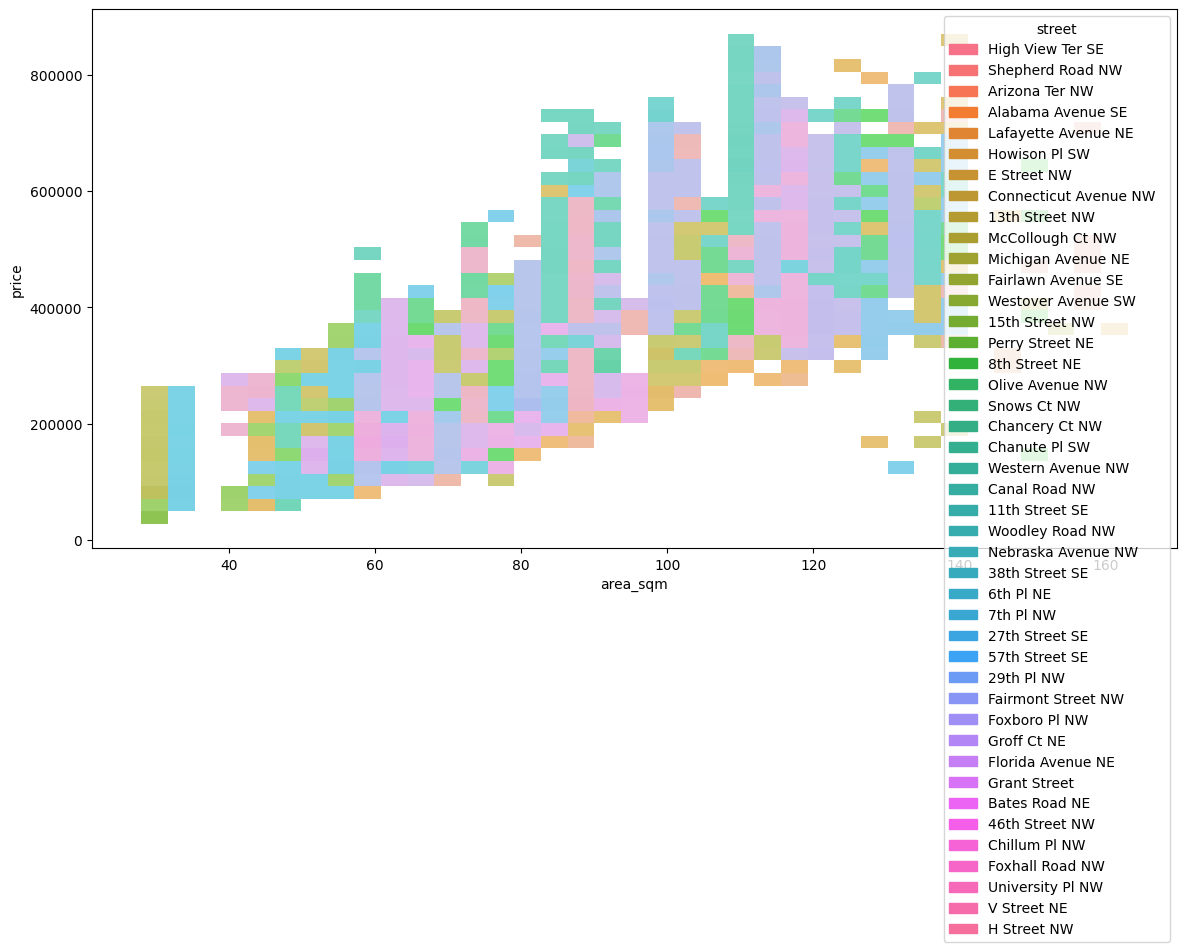

In [6]:
plt.figure(figsize=(14, 7))
sns.histplot(x="area_sqm", y="price", data=df, hue='street', hue_order=df['street'].unique().sort())

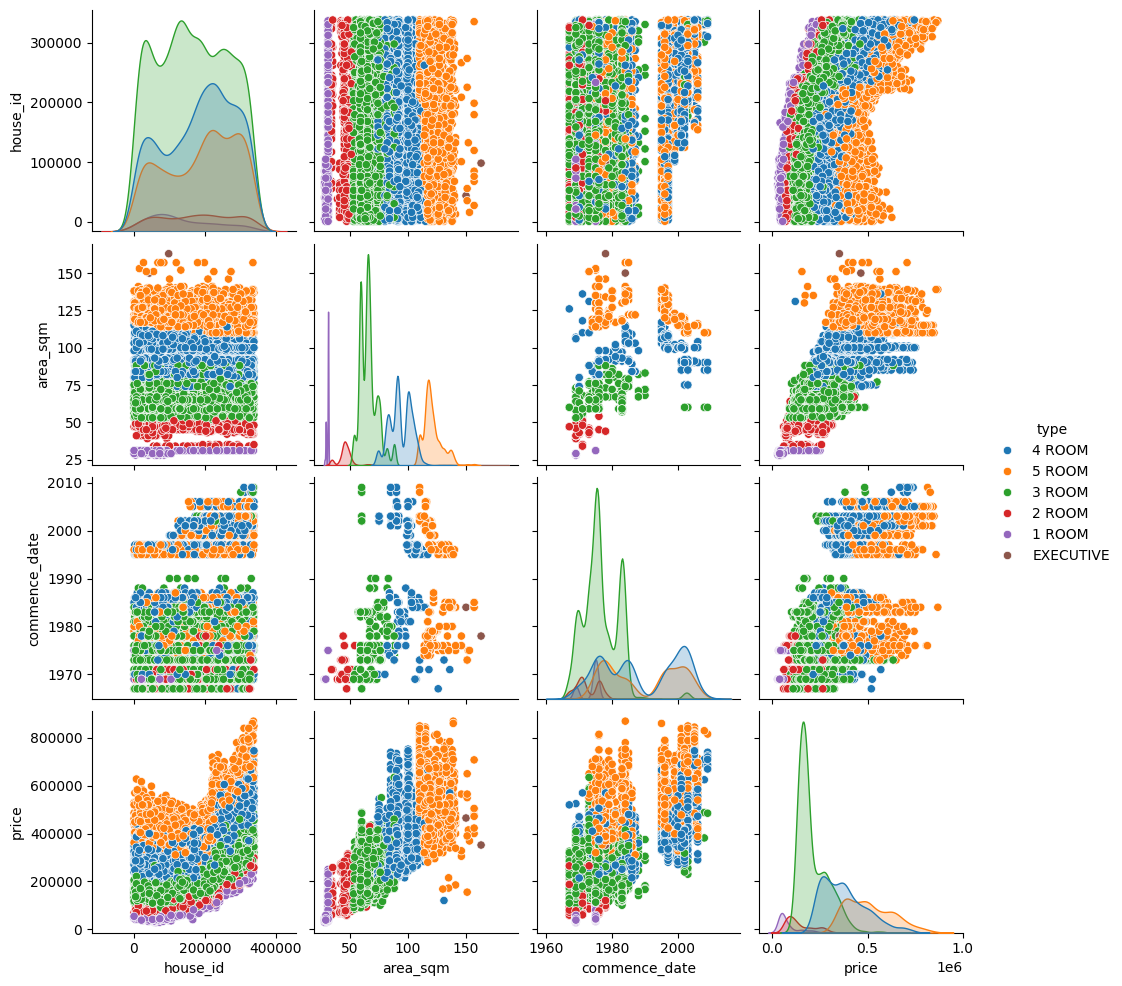

In [7]:
sns.pairplot(df, hue='type')

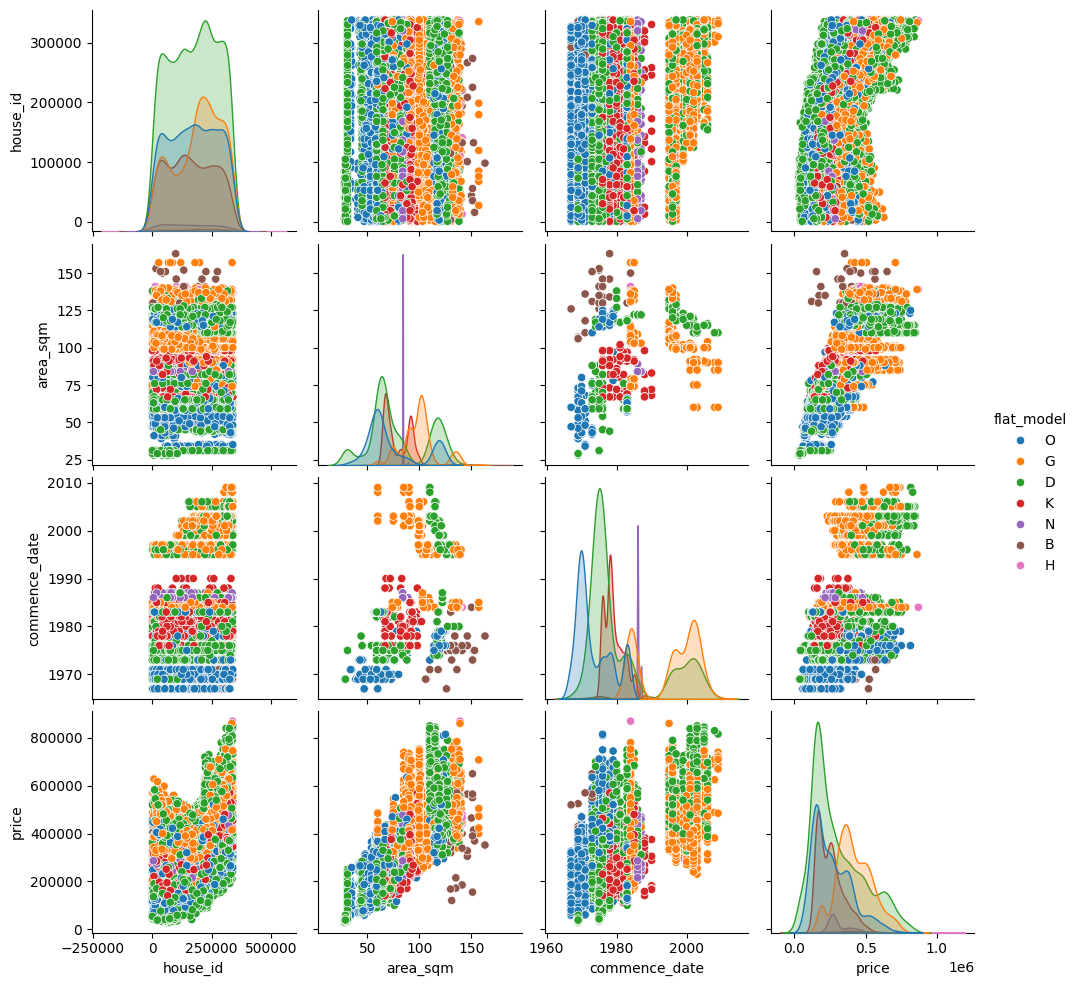

In [8]:
sns.pairplot(df, hue='flat_model')


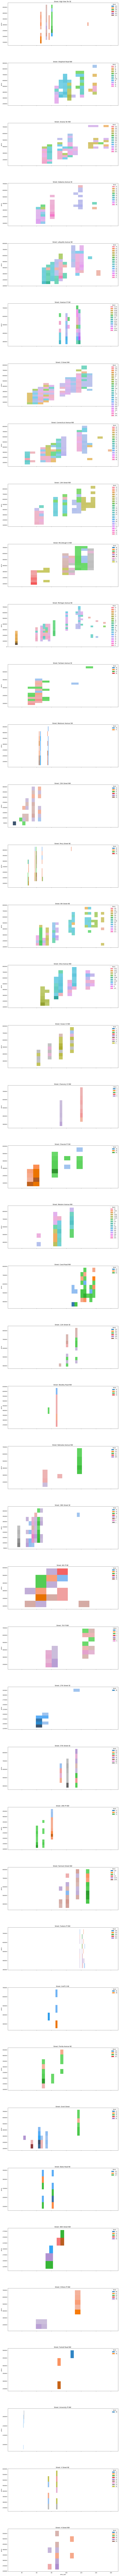

In [9]:
streets = df['street'].unique()

# Create a figure with subplots for each street
fig, axes = plt.subplots(len(streets), 1, figsize=(14, 7 * len(streets)), sharex=True)

# Iterate over each street
for i, street in enumerate(streets):
    # Filter the dataframe for the current street
    street_df = df[df['street'] == street]

    # Select the appropriate axis
    ax = axes[i] if len(streets) > 1 else axes

    # Plot histplot with hue as 'block' for the current street
    sns.histplot(x="area_sqm", y="price", data=street_df, hue='block', ax=ax)

    # Set the title for the current subplot
    ax.set_title(f'Street: {street}')

plt.tight_layout()
plt.show()